In [1]:
from math import e #eulers number
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases #dictionary of encoding names and associated alias
%matplotlib inline 

In [2]:
def rm2(w, r): #return 1rm estimations based on weight(w) and reps(r)
    brzycki = w/(1.0278-(.0278*r)) 
    epley = w*(1+(.0333*r))
    lander = 100*(w/(101.3-(2.61723*r)))
    mcglothin = (100*w)/(101.3 - (2.67123*r))
    lombardi = w*(r**.10)
    mayhew = (100*w)/(52.2+(41.9*e**(-.055*r)))
    oconnor = w*(1+.025*r)
    wathan = (100*w)/(48.8+(53.8*e**(-.075*r)))
    return [['Brzycki',brzycki],['Epley',epley],['Lander',lander],['Mcglothin',mcglothin],
            ['Lombardi',lombardi],['Mayhew',mayhew,], ['Oconnor',oconnor], ['Wathan',wathan]]
    
def myround(x, base): #round x to nearest base value
    return base * round(x/base)


In [3]:
squat=rm2(225, 8)
df_squat = pd.DataFrame(squat)
df_squat.columns=['Calc_name','Max']
df_squat['Inc_25'] = myround(df_squat['Max'],2.5) 
df_squat.head()
df_squat.loc[len(df_squat.index)] = ['Actual', 290, 290] 
df_squat = df_squat.sort_values('Calc_name')
df_squat = df_squat.drop_duplicates()
print(df_squat)

   Calc_name         Max  Inc_25
8     Actual  290.000000   290.0
0    Brzycki  279.364291   280.0
1      Epley  284.940000   285.0
2     Lander  279.982519   280.0
4   Lombardi  277.007493   277.5
5     Mayhew  284.144272   285.0
3  Mcglothin  281.495746   282.5
6    Oconnor  270.000000   270.0
7     Wathan  287.260693   287.5


In [4]:
bench=rm2(225,5)
df_bench = pd.DataFrame(bench)
df_bench.columns = ['Calc_name','Max']
df_bench['Inc_25'] = myround(df_bench['Max'],2.5)
df_bench.loc[len(df_bench.index)] = ['Actual', 235, 235] 
df_bench = df_bench.sort_values('Calc_name')
print(df_bench)

   Calc_name         Max  Inc_25
8     Actual  235.000000   235.0
0    Brzycki  253.150315   252.5
1      Epley  262.462500   262.5
2     Lander  255.061989   255.0
4   Lombardi  264.289262   265.0
5     Mayhew  267.774031   267.5
3  Mcglothin  255.845065   255.0
6    Oconnor  253.125000   252.5
7     Wathan  262.310637   262.5


In [5]:
df_s_styled = df_squat.style.set_caption('Squat')
df_b_styled = df_bench.style.set_caption('Bench')

from IPython.display import HTML

def display_dfs(dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 32px">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))
dfs = [df_s_styled, df_b_styled]
display_dfs(dfs)

,Calc_name,Max,Inc_25
8,Actual,290.000000,290.000000
0,Brzycki,279.364291,280.000000
1,Epley,284.940000,285.000000
2,Lander,279.982519,280.000000
4,Lombardi,277.007493,277.500000
5,Mayhew,284.144272,285.000000
3,Mcglothin,281.495746,282.500000
6,Oconnor,270.000000,270.000000
7,Wathan,287.260693,287.500000
,Calc_name,Max,Inc_25


Text(0.5, 1.0, 'Squat 1RM: Calculated vs Actual')

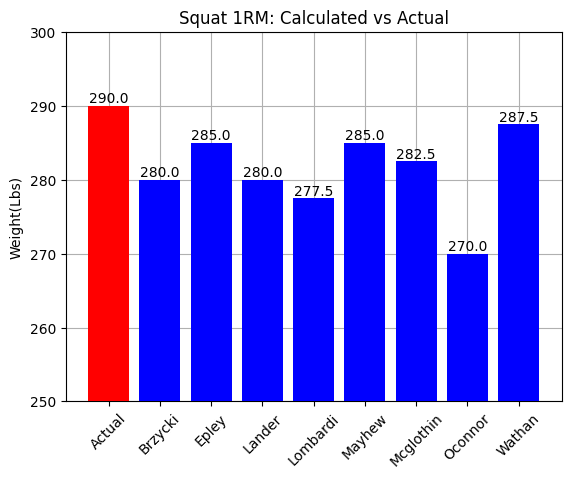

In [6]:
x1 = df_squat.Calc_name
y1 = df_squat.Inc_25
colors = ['b'] * 9
colors[0] = 'r'
ax1 = plt.bar(x1, y1, color = colors, zorder=3)
plt.bar_label(ax1, labels=y1,label_type='edge', zorder=3)
#sns.boxplot(data = y)
plt.grid(zorder=0)
plt.xticks(rotation=45)
plt.ylim(250, 300)
plt.ylabel('Weight(Lbs)')
plt.title('Squat 1RM: Calculated vs Actual')

Text(0.5, 1.0, 'Bench 1RM: Calculated vs Actual')

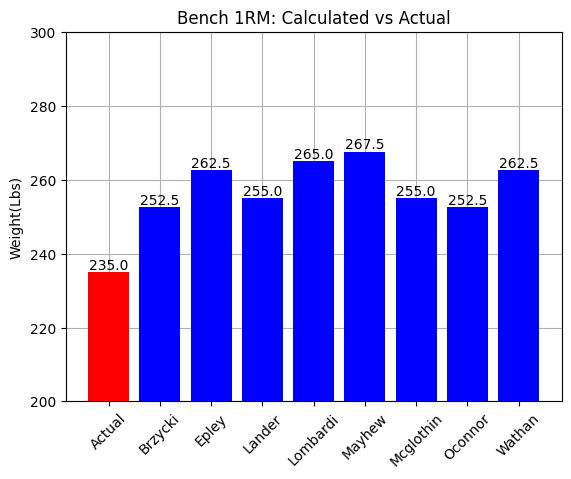

In [7]:
x2 = df_bench.Calc_name
y2 = df_bench.Inc_25
ax2 = plt.bar(x2, y2, color = colors, zorder=3)
plt.bar_label(ax2, labels=y2,label_type='edge', zorder=3)
plt.grid(zorder=0)
plt.xticks(rotation=45)
plt.ylim(200, 300)
plt.ylabel('Weight(Lbs)')
plt.title('Bench 1RM: Calculated vs Actual')

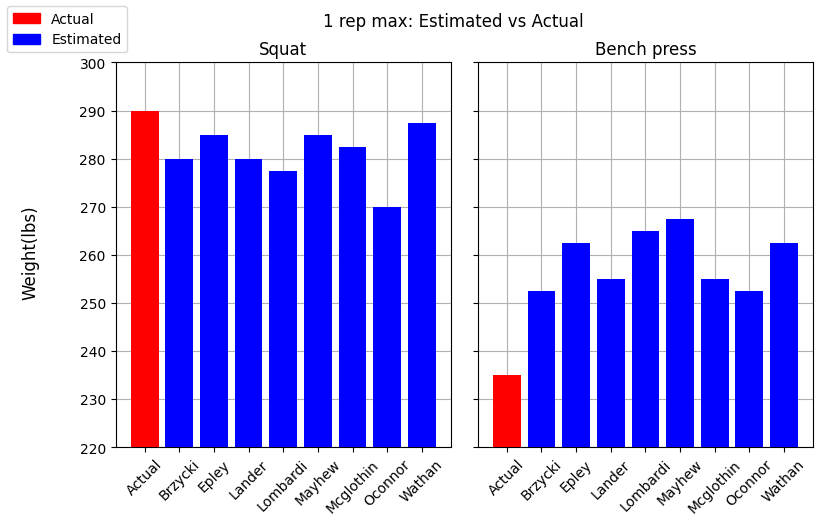

In [8]:
#Define Axis
x2 = df_bench.Calc_name
y2 = df_bench.Inc_25
x1 = df_squat.Calc_name
y1 = df_squat.Inc_25

#fig for adjusting entire figure, ax is for adjusting subplots specificied by index position of grid
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize=(9,5))
fig.suptitle('1 rep max: Estimated vs Actual')
fig.supylabel('Weight(lbs)')
fig.subplots_adjust(wspace=0.08) #adjust vertical spacing 

#squat subplot
ax[0].bar(x1,y1, color=colors, zorder = 3)
ax[0].grid(zorder=0)
ax[0].tick_params(axis = 'x', rotation = 45) 
ax[0].set_ylim([220, 300])
ax[0].set_title('Squat')

#bench subplot
ax[1].bar(x2,y2, color=colors, zorder=3)
ax[1].grid(zorder=0)
ax[1].tick_params(axis = 'x', rotation = 45) 
ax[1].set_ylim([220, 300])
ax[1].set_title('Bench press')
ax[1].tick_params('y', labelleft=False) #Remove y axis label

#create legend
import matplotlib.patches as mpatches
actual_r = mpatches.Patch(color='r', label='Actual')
estimated_b = mpatches.Patch(color='b',label='Estimated')
fig.legend(handles=[actual_r, estimated_b], loc='upper left')